# Exploratory Data Analysis and Feature Engineering - Black Friday Dataset

In [4]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline


## Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products

## Data Ingestion

In [5]:
# import dataset 
df_train  = pd.read_csv('source/data/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# Shape
df_train.shape

(550068, 12)

In [7]:
df_test = pd.read_csv('source/data/test.csv')
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [8]:
# Shape
df_test.shape

(233599, 11)

In [9]:
# Concat both data frames
data = pd.concat([df_train, df_test], ignore_index=True)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
# Shape
data.shape

(783667, 12)

In [11]:
# Data set Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [12]:
# Data set Statistics
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [13]:
# Dopping column
data.drop('User_ID', axis='columns', inplace=True)

In [14]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Handling Categorical Features

***Gender Column***

In [15]:
# Encoding of Gender column
data.Gender = data.Gender.map({'F': 0, 'M' : 1})
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


***Age Column***

In [16]:
data.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [17]:
# Encoding Age column
# This way of encoding is called target guiding
data.Age = data.Age.map({'0-17': 1, '18-25' : 2, '26-35' : 3, '36-45': 4,  '46-50' : 5, '51-55' : 6, '55+' : 7})

In [18]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [19]:
# Using label encoding

# Label encoder object
#label_encoder = preprocessing.LabelEncoder()

# Label encoding
#data.Age = label_encoder.fit_transform(data['Age'])
#data.Age.unique()

***City_Category Column***

In [20]:
# Using get_dummies()
city = pd.get_dummies(data['City_Category'], drop_first=True, dtype=int).rename(columns={'B': 'City_Category_B', 'C': 'City_Category_C'})
city.head()

,City_Category_B,City_Category_C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [21]:
# Concating dummies with main data set
data = pd.concat([data, city], axis='columns')
data

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,1,0
783663,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,1,0
783664,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [22]:
# Drop City_Category column
data.drop('City_Category', axis='columns', inplace=True)
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


***Stay_in_Current_City_Years***

In [23]:
# Unique values in Stay_In_Current_City_Years column
data.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [24]:
data.Stay_In_Current_City_Years = data.Stay_In_Current_City_Years.map({'0': 0, '1': 1, '2': 2, "3": 3, "4+" : 4})
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4,0,8,NaN,NaN,7969.0,0,1


## Handling Missing Values

In [25]:
# Missing value check
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
City_Category_B                    0
City_Category_C                    0
dtype: int64

**Replace NA values in categorical feature column with mode(for numeric values) instead of mean as, mean will create new category for the given feature**

In [26]:
# Getting value counts
data.Product_Category_2.value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [27]:
# Getting value counts
data.Product_Category_3.value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [28]:
# Replace NA value with mode 
data.Product_Category_2 = data.Product_Category_2.fillna(data['Product_Category_2'].mode()[0])
data.Product_Category_3 = data.Product_Category_3.fillna(data['Product_Category_3'].mode()[0])

In [29]:
data['Product_Category_3'].isnull().sum()

np.int64(0)

In [30]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  City_Category_B             783667 non-null  int64  
 11  City_Category_C             783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


## Visualization

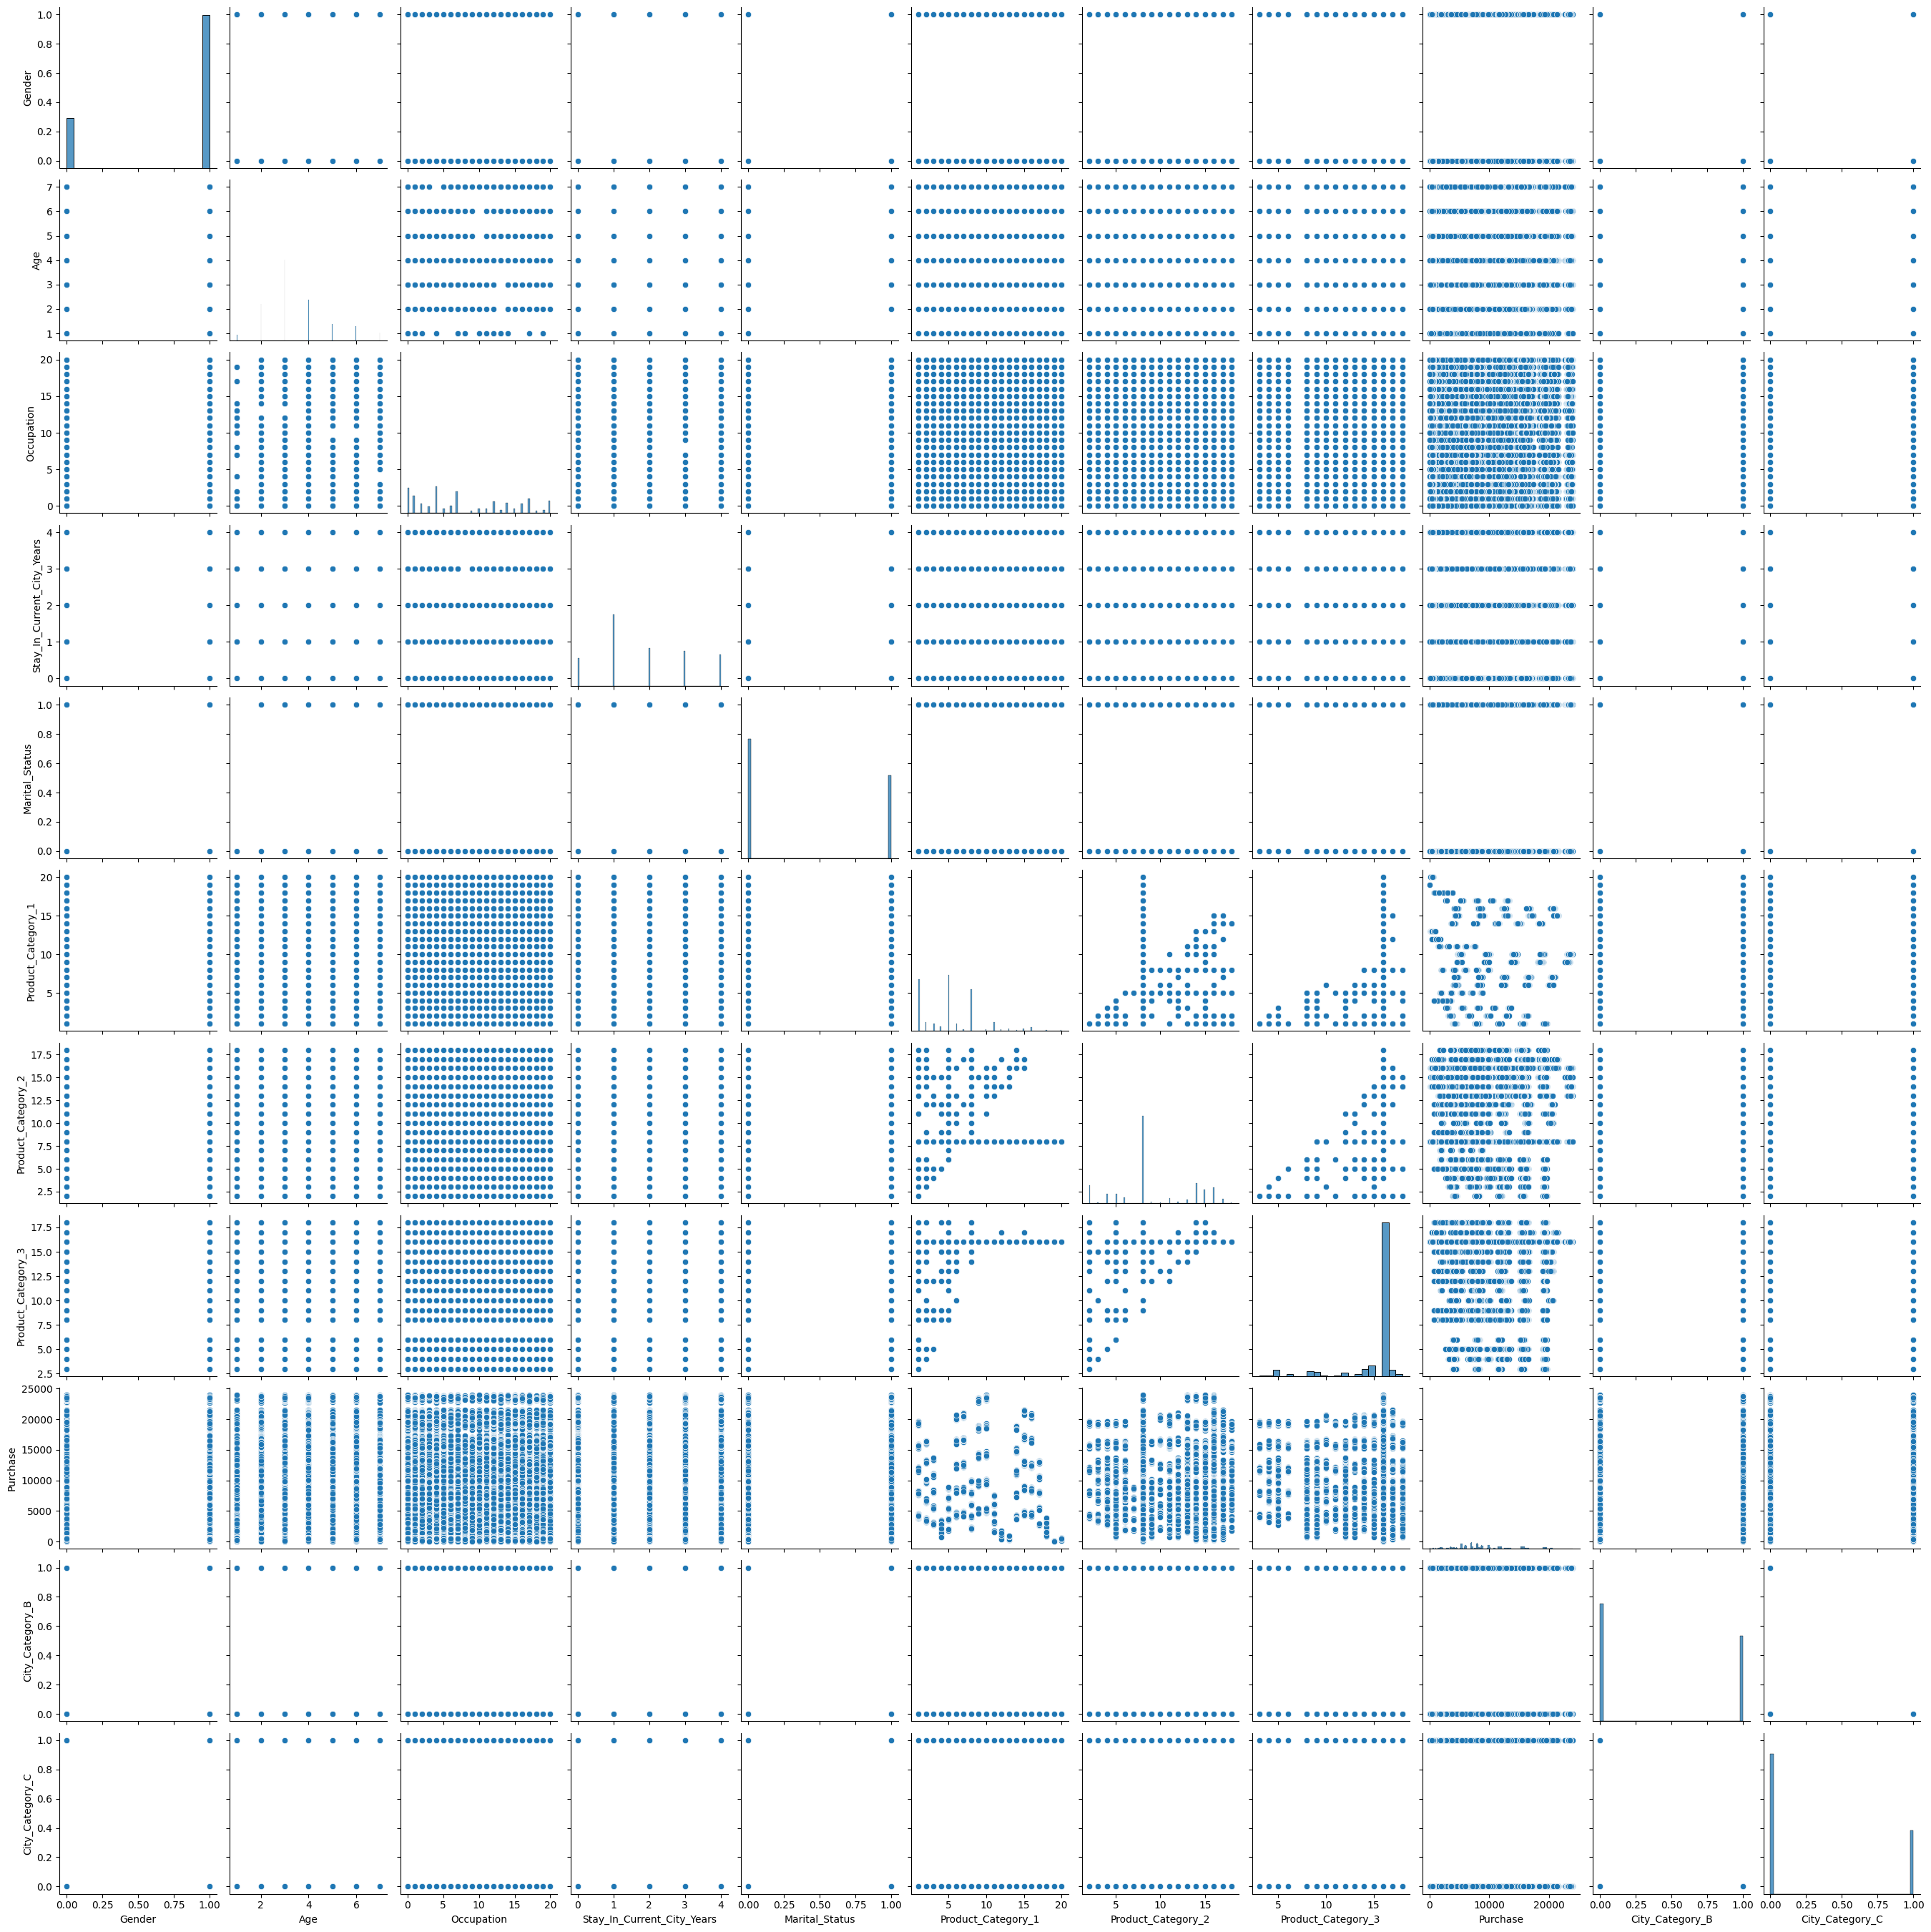

In [32]:
# Painplot
sns.pairplot(data=data)
plt.show()

- The sns.pairplot() function provides a pairwise scatter plot matrix that helps visualize relationships between numerical variables in a dataset. Here's what we can learn from it:

**Key Insights from a Pairplot:**

*Correlation Between Features*

- Scatter plots in the off-diagonal cells show how each pair of numerical variables relates.

- If a pattern is linear, the two variables are correlated.

- A strong diagonal trend suggests high correlation.

*Feature Distributions*

- The diagonal elements show histograms (or KDE plots) of individual features.

- Helps identify skewness, outliers, or multimodal distributions.

*Clusters & Separability*

- If a dataset has categories (hue="category"), colors distinguish groups.

- If groups are well separated, it indicates the model can classify them well.

- Overlapping clusters suggest difficulty in classification.

*Outliers Detection*

- Points far from the main clusters can indicate anomalies.

***Age Vs Purchases Bar plot***

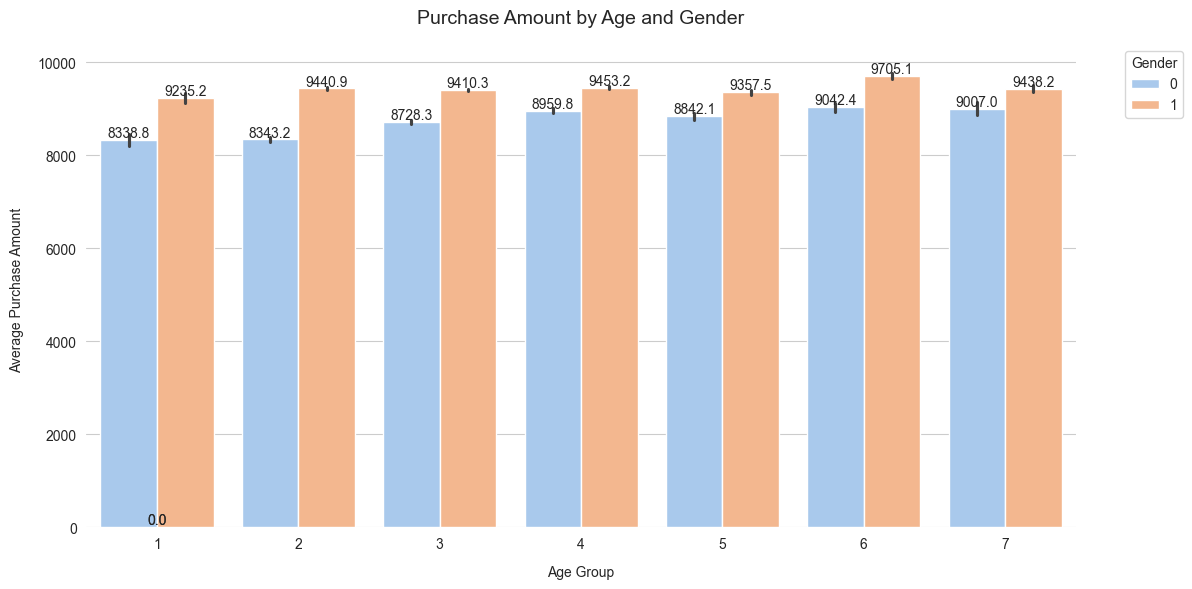

In [37]:
# Set style for better aesthetics
sns.set_style("whitegrid")

# Create figure with adjusted size and layout
plt.figure(figsize=(12, 6), tight_layout=True)

# Create the barplot with improved parameters
ax = sns.barplot(
    x='Age', 
    y='Purchase', 
    hue='Gender', 
    data=data,
    palette="pastel",  # More subtle color palette
    saturation=0.8     # Slightly desaturate colors for better readability
)

# Improve title and labels
plt.title("Purchase Amount by Age and Gender", pad=20, fontsize=14)
plt.xlabel("Age Group", labelpad=10)
plt.ylabel("Average Purchase Amount", labelpad=10)


# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}", 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

# Improve legend placement and title
plt.legend(
    title="Gender",
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.
)

# Adjust spines for cleaner look
sns.despine(left=True, bottom=True)

# Show plot
plt.show()

***Insights***

- In every age group, men have a higher purchase amount

***Purchase Vs Occupation***

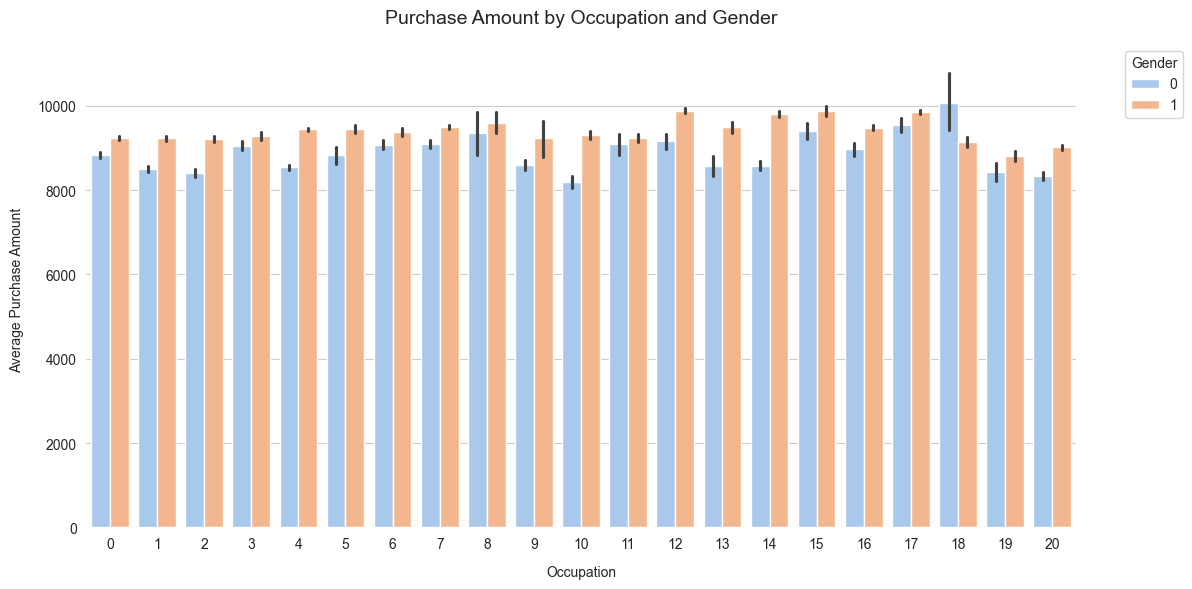

In [42]:
# Set style for better aesthetics
sns.set_style("whitegrid")

# Create figure with adjusted size and layout
plt.figure(figsize=(12, 6), tight_layout=True)

# Create the barplot with improved parameters
ax = sns.barplot(
    x='Occupation', 
    y='Purchase', 
    hue='Gender', 
    data=data,
    palette="pastel",  # More subtle color palette
    saturation=0.8     # Slightly desaturate colors for better readability
)

# Improve title and labels
plt.title("Purchase Amount by Occupation and Gender", pad=20, fontsize=14)
plt.xlabel("Occupation", labelpad=10)
plt.ylabel("Average Purchase Amount", labelpad=10)



# Improve legend placement and title
plt.legend(
    title="Gender",
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.
)

# Adjust spines for cleaner look
sns.despine(left=True, bottom=True)

# Show plot
plt.show()

***Product Category Vs Purchase***

## Feature Scaling

In [53]:
# Splitting data in train & test dataset
train = data[~data['Purchase'].isnull()]
validation = data[data['Purchase'].isnull()]

In [54]:
train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [55]:
validation.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
550068,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
550069,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
550070,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
550071,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
550072,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [56]:
train.shape

(550068, 12)

In [57]:
validation.shape

(233599, 12)

In [62]:
# Training data frame with only independent features
X = train.drop('Purchase', axis='columns')
X = X.drop('Product_ID', axis='columns')

In [63]:
X.shape

(550068, 10)

In [64]:
# Training data frame with only dependent feature
y = train['Purchase']

In [65]:
y.shape

(550068,)

In [66]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [67]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
